In [1]:
import cv2
import numpy as np
import urllib
import matplotlib.pyplot as plt

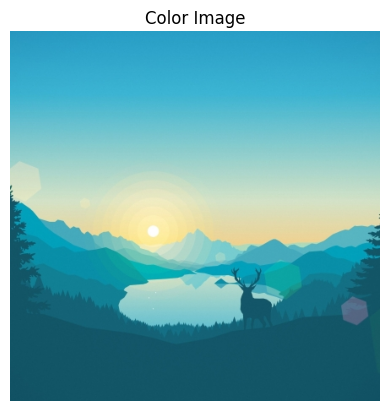

Number of Rows: 438
Number of Columns: 438


In [2]:
image_url = "https://mypage114041763.files.wordpress.com/2023/09/save_20220107_224016.jpg?resize=438%2C438"
req = urllib.request.urlopen(image_url)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
color_image = cv2.imdecode(arr, -1)

plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))  # Display the color image using matplotlib
plt.axis('off')
plt.title("Color Image")
plt.show()
num_rows, num_cols, _ = color_image.shape  # Get the number of rows and columns
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_cols}")

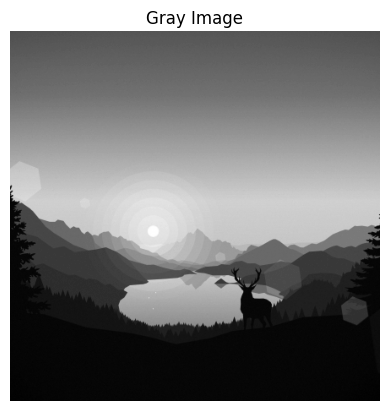

Number of Rows: 438
Number of Columns: 438


In [3]:
gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)  # color image to grayscale
plt.imshow(gray_image, cmap='gray')
plt.axis('off')  
plt.title("Gray Image")
plt.show()
num_rows, num_cols = gray_image.shape
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_cols}")

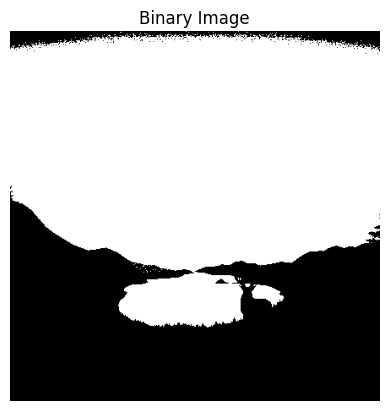

Number of Rows: 438
Number of Columns: 438


In [4]:
_, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)  #create a binary image
plt.imshow(binary_image, cmap='gray')
plt.axis('off')
plt.title("Binary Image")
plt.show()
num_rows, num_cols = binary_image.shape
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_cols}")

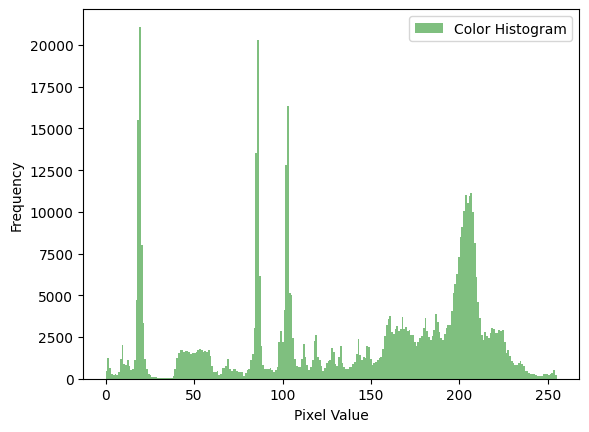

<Figure size 100x100 with 0 Axes>

In [5]:
plt.hist(color_image.ravel(), bins=256, color='g', alpha=0.5, label='Color Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend()

fig = plt.figure()
fig.set_figheight(1)
fig.set_figwidth(1)

plt.tight_layout()
plt.show()


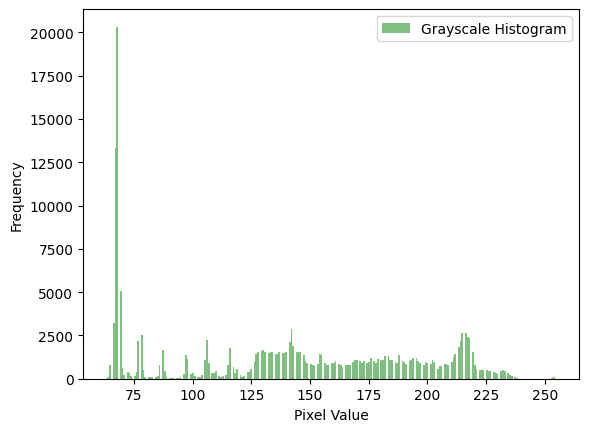

<Figure size 100x100 with 0 Axes>

In [6]:
plt.hist(gray_image.ravel(), bins=256, color='g', alpha=0.5, label='Grayscale Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend()

fig = plt.figure()
fig.set_figheight(1)
fig.set_figwidth(1)

plt.tight_layout()
plt.show()

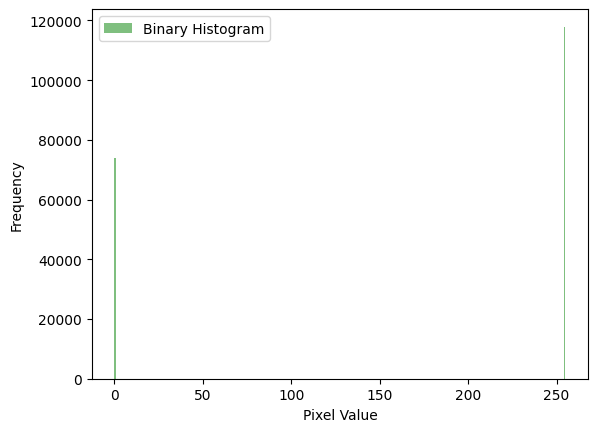

<Figure size 100x100 with 0 Axes>

In [7]:
plt.hist(binary_image.ravel(), bins=256, color='g', alpha=0.5, label='Binary Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend()

fig = plt.figure()
fig.set_figheight(1)
fig.set_figwidth(1)

plt.tight_layout()
plt.show()

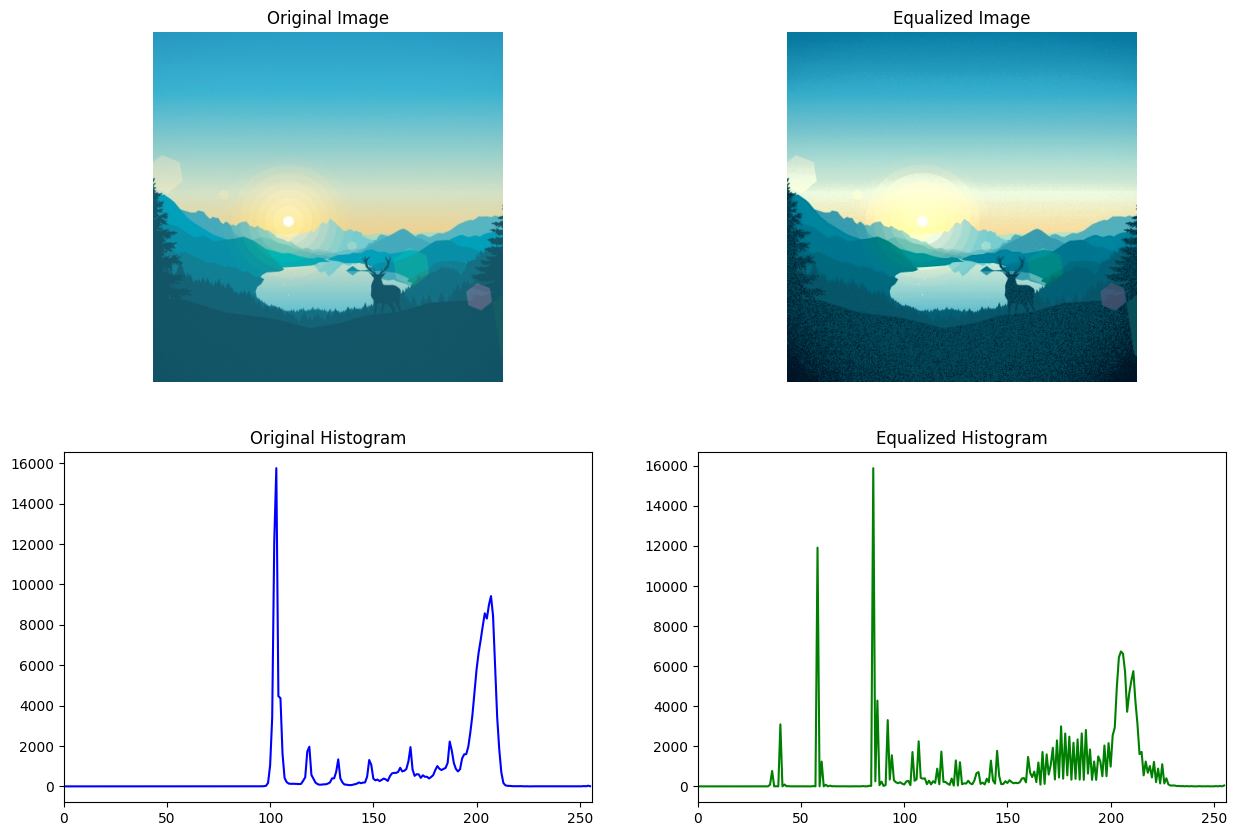

<Figure size 100x100 with 0 Axes>

In [8]:

# Convert the image to the YUV color space
image_yuv = cv2.cvtColor(color_image, cv2.COLOR_BGR2YUV)

# Apply histogram equalization to the luminance channel (Y)
image_yuv[:,:,0] = cv2.equalizeHist(image_yuv[:,:,0])

# Convert the equalized YUV image back to BGR color space
equalized_image = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2BGR)

# Calculate histograms 
hist_original = cv2.calcHist([color_image], [0], None, [256], [0, 256])
hist_equalized = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])

# Display the original and equalized images and their respective histograms
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Equalized Image")
plt.imshow(cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title("Original Histogram")
plt.plot(hist_original, color='blue')
plt.xlim([0, 256])

plt.subplot(2, 2, 4)
plt.title("Equalized Histogram")
plt.plot(hist_equalized, color='green')
plt.xlim([0, 256])

fig = plt.figure()
fig.set_figheight(1)
fig.set_figwidth(1)
plt.tight_layout()
plt.show()

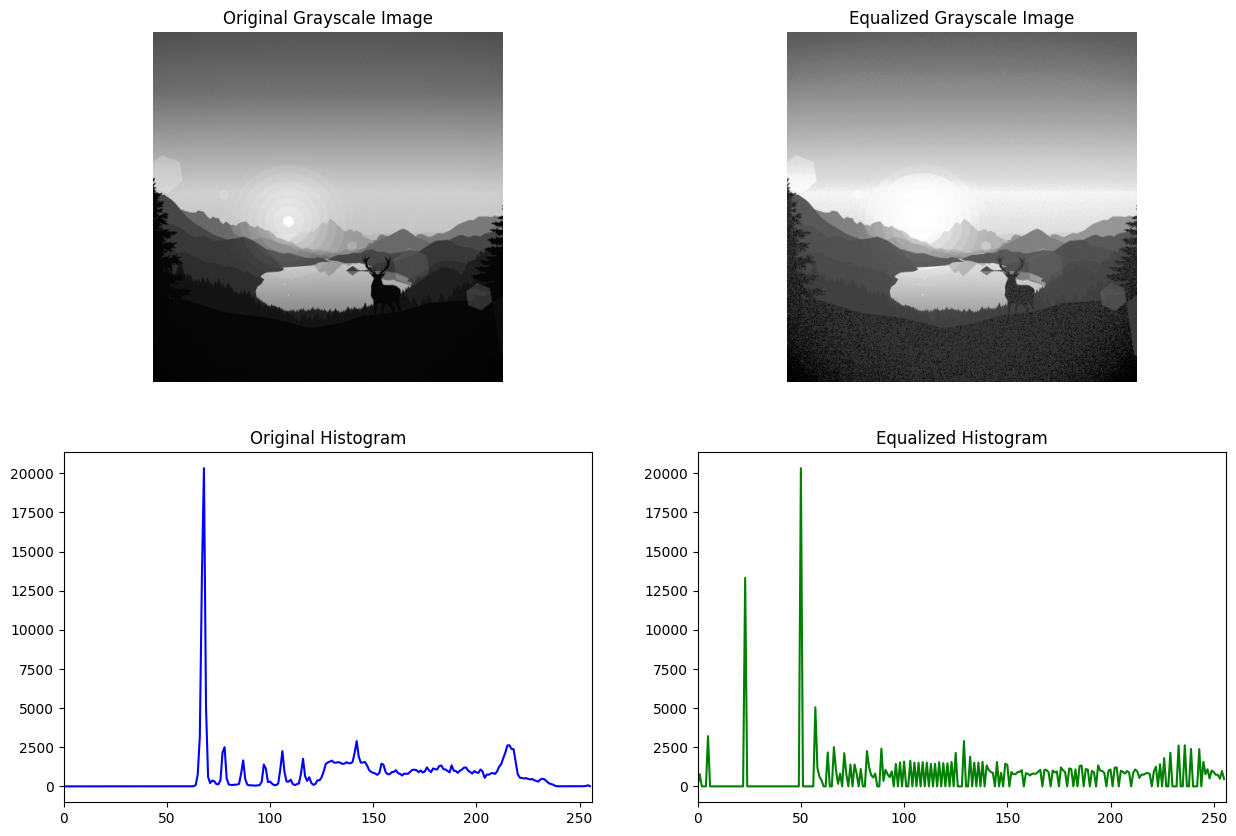

<Figure size 100x100 with 0 Axes>

In [9]:

# Apply histogram equalization
equalized_image = cv2.equalizeHist(gray_image)

# Calculate histograms 
hist_original = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
hist_equalized = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])

# Display the original and equalized images and their respective histograms
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.title("Original Grayscale Image")
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Equalized Grayscale Image")
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title("Original Histogram")
plt.plot(hist_original, color='blue')
plt.xlim([0, 256])

plt.subplot(2, 2, 4)
plt.title("Equalized Histogram")
plt.plot(hist_equalized, color='green')
plt.xlim([0, 256])

fig = plt.figure()
fig.set_figheight(1)
fig.set_figwidth(1)

plt.tight_layout()
plt.show()

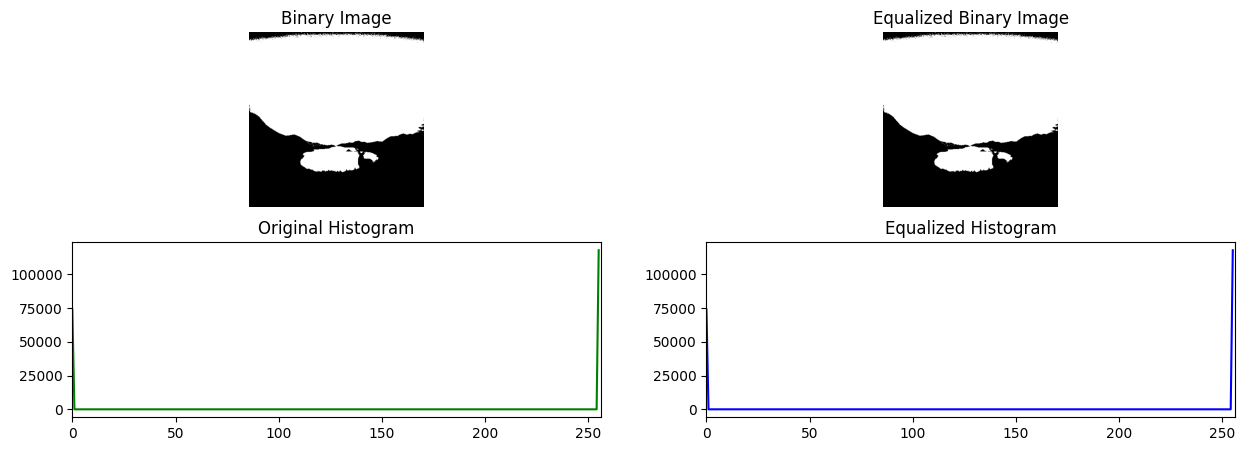

<Figure size 100x100 with 0 Axes>

In [10]:

# Calculate the histogram of the original binary image
hist_original = cv2.calcHist([binary_image], [0], None, [256], [0, 256])

# Apply histogram equalization (won't have any practical effect on a binary image)
equalized_image = cv2.equalizeHist(binary_image)

# Calculate the histogram of the equalized binary image (still binary)
hist_equalized = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])

# Display the binary image and its histograms
plt.figure(figsize=(15, 5))

plt.subplot(2, 2, 1)
plt.title("Binary Image")
plt.imshow(binary_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Equalized Binary Image")
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title("Original Histogram")
plt.plot(hist_original, color='green')
plt.xlim([0, 256])

plt.subplot(2, 2, 4)
plt.title("Equalized Histogram")
plt.plot(hist_equalized, color='blue')
plt.xlim([0, 256])

fig = plt.figure()
fig.set_figheight(1)
fig.set_figwidth(1)

plt.tight_layout()
plt.show()

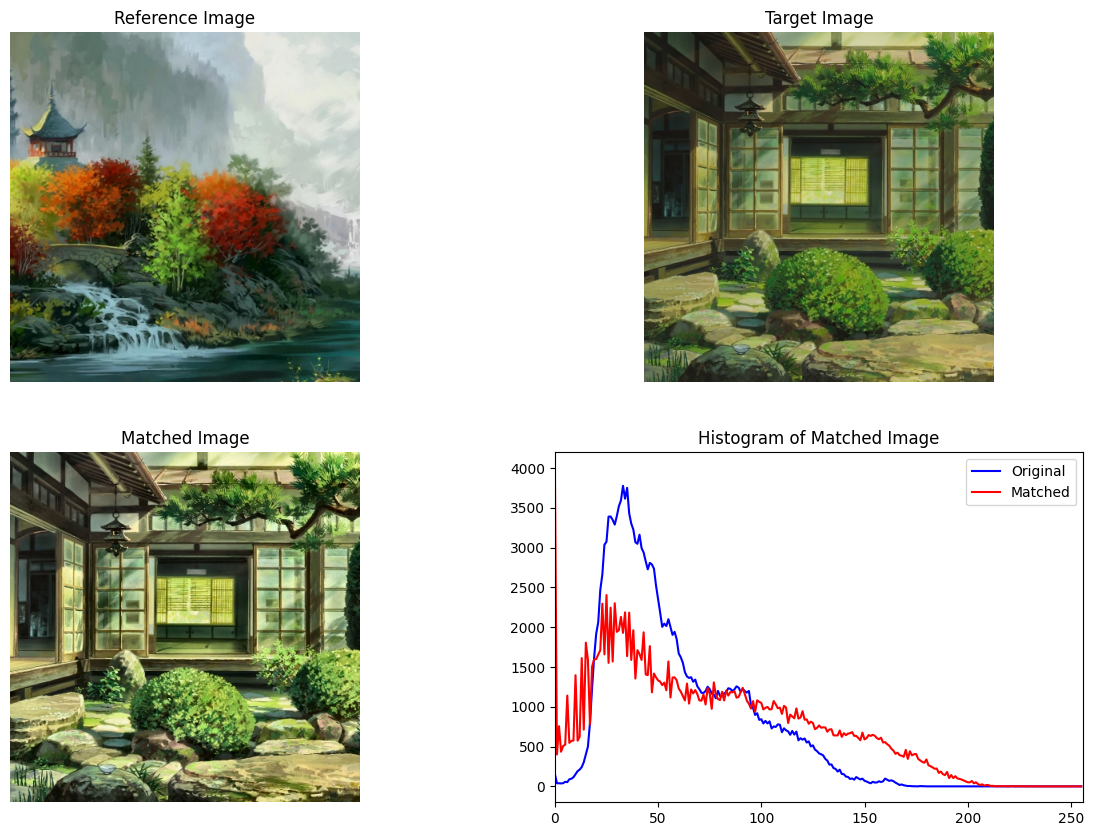

<Figure size 100x100 with 0 Axes>

In [11]:
# Load the reference image whose histogram you want to match to (should be the same size)
image_url_A = "https://mypage114041763.files.wordpress.com/2023/09/f6skya.jpg?resize=438%2C438"
image_url_B = "https://mypage114041763.files.wordpress.com/2023/09/save_20220131_184919_1920x1080.jpg?resize=438%2C438"

req_A = urllib.request.urlopen(image_url_A)
req_B = urllib.request.urlopen(image_url_B)
arr_A = np.asarray(bytearray(req_A.read()), dtype=np.uint8)
arr_B = np.asarray(bytearray(req_B.read()), dtype=np.uint8)

reference_image = cv2.imdecode(arr_A, -1)
target_image = cv2.imdecode(arr_B, -1)

# Convert the images to LAB color space
reference_lab = cv2.cvtColor(reference_image, cv2.COLOR_BGR2LAB)
target_lab = cv2.cvtColor(target_image, cv2.COLOR_BGR2LAB)

# Split the LAB channels
L_ref, A_ref, B_ref = cv2.split(reference_lab)
L_tar, A_tar, B_tar = cv2.split(target_lab)

# Apply histogram matching to the L channel (luminance)
L_matched = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8)).apply(L_tar)

# Merge the matched L channel with the original A and B channels
matched_lab = cv2.merge((L_matched, A_tar, B_tar))

# Convert the matched LAB image back to BGR color space
matched_image = cv2.cvtColor(matched_lab, cv2.COLOR_LAB2BGR)

# Calculate histograms for the original and matched images
hist_original = cv2.calcHist([target_image], [0], None, [256], [0, 256])
hist_matched = cv2.calcHist([matched_image], [0], None, [256], [0, 256])

# Display the original and matched images and their respective histograms
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.title("Reference Image")
plt.imshow(cv2.cvtColor(reference_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Target Image")
plt.imshow(cv2.cvtColor(target_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title("Matched Image")
plt.imshow(cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Histogram of Matched Image")
plt.plot(hist_original, color='blue', label='Original')
plt.plot(hist_matched, color='red', label='Matched')
plt.legend()
plt.xlim([0, 256])

fig = plt.figure()
fig.set_figheight(1)
fig.set_figwidth(1)

plt.tight_layout()
plt.show()


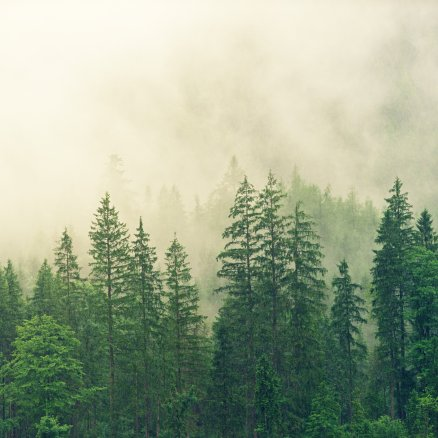

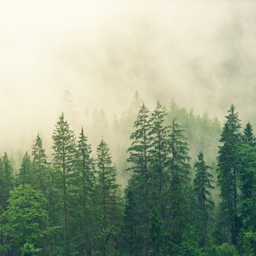

In [12]:
from PIL import Image
import requests
from io import BytesIO
import IPython.display as display

def resize_image(input_image_url, output_image_path, new_width, new_height):
    # Load the image from a URL
    response = requests.get(input_image_url)
    original_image = Image.open(BytesIO(response.content))

    # Resize the image
    resized_image = original_image.resize((new_width, new_height))

    # Display and save the resized image
    display.display(original_image)
    display.display(resized_image)
    resized_image.save(output_image_path)

# Example usage:
input_image_url = 'https://mypage114041763.files.wordpress.com/2023/09/nature-wallpaper-3622519.jpg?resize=438%2C438'  # Replace with the URL of your original image
output_image_path = 'resized_image.jpg'  # Path where the resized image will be saved
new_width = 256
new_height = 256

resize_image(input_image_url, output_image_path, new_width, new_height)


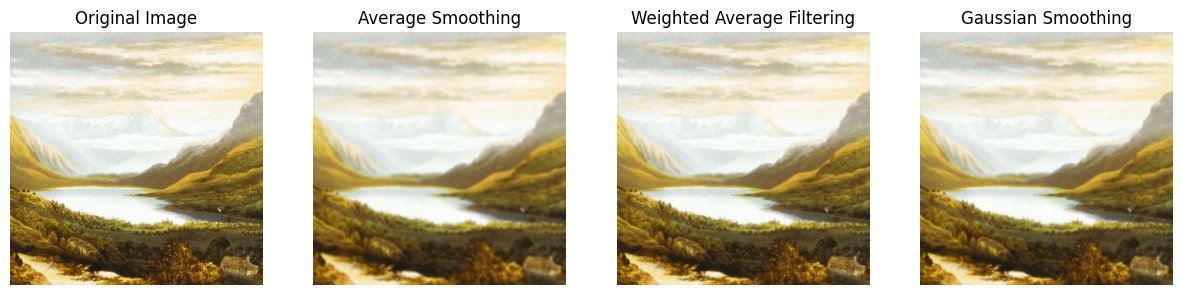

In [13]:
import requests
from PIL import Image
from io import BytesIO
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Replace with the URL of the image you want to download
image_url = "https://mypage114041763.files.wordpress.com/2023/09/british-library-gudnk8nqyhk-unsplash.jpg?resize=438%2C438"

# Send a GET request to the URL to fetch the image content
response = requests.get(image_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Read the image content as bytes
    image_data = response.content

    # Create an in-memory binary stream to read the image data
    image_stream = BytesIO(image_data)

    # Open the image using PIL (Pillow)
    img = Image.open(image_stream)

    # Convert the PIL image to a NumPy array
    img_array = np.array(img)

    # Apply average smoothing using OpenCV
    kernel_size = (5, 5)  # Adjust the kernel size as needed
    averaged_image = cv2.blur(img_array, kernel_size)

    # Apply weighted average filtering using OpenCV
    weighted_kernel = np.array([[1, 2, 1],
                                [2, 4, 2],
                                [1, 2, 1]], dtype=np.float32) / 16
    weighted_image = cv2.filter2D(img_array, -1, weighted_kernel)

    # Apply Gaussian smoothing using OpenCV
    gaussian_kernel_size = (5, 5)  # Adjust the kernel size as needed
    gaussian_image = cv2.GaussianBlur(img_array, gaussian_kernel_size, 0)

    # Convert the smoothed images back to PIL format
    averaged_img_pil = Image.fromarray(averaged_image)
    weighted_img_pil = Image.fromarray(weighted_image)
    gaussian_img_pil = Image.fromarray(gaussian_image)

    # Display the original and smoothed images
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 4, 1)
    plt.title("Original Image")
    plt.imshow(img)
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.title("Average Smoothing")
    plt.imshow(averaged_img_pil)
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.title("Weighted Average Filtering")
    plt.imshow(weighted_img_pil)
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.title("Gaussian Smoothing")
    plt.imshow(gaussian_img_pil)
    plt.axis('off')

    plt.show()

else:
    print(f"Failed to fetch the image. Status code: {response.status_code}")


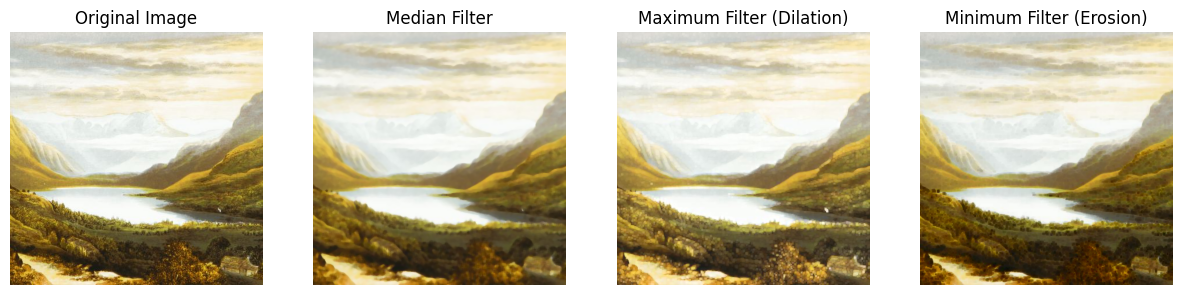

In [14]:
import requests
from PIL import Image
from io import BytesIO
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Replace with the URL of the image you want to download
image_url = "https://mypage114041763.files.wordpress.com/2023/09/british-library-gudnk8nqyhk-unsplash.jpg?resize=438%2C438"

# Send a GET request to the URL to fetch the image content
response = requests.get(image_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Read the image content as bytes
    image_data = response.content

    # Create an in-memory binary stream to read the image data
    image_stream = BytesIO(image_data)

    # Open the image using PIL (Pillow)
    img = Image.open(image_stream)

    # Convert the PIL image to a NumPy array
    img_array = np.array(img)

    # Apply median filter using OpenCV
    kernel_size = 5  # Adjust the kernel size as needed
    median_filtered_image = cv2.medianBlur(img_array, kernel_size)

    # Apply maximum filter (dilation) using OpenCV
    max_filtered_image = cv2.dilate(img_array, None, iterations=1)

    # Apply minimum filter (erosion) using OpenCV
    min_filtered_image = cv2.erode(img_array, None, iterations=1)

    # Convert the filtered images back to PIL format
    median_filtered_img_pil = Image.fromarray(median_filtered_image)
    max_filtered_img_pil = Image.fromarray(max_filtered_image)
    min_filtered_img_pil = Image.fromarray(min_filtered_image)

    # Display the original and filtered images
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 4, 1)
    plt.title("Original Image")
    plt.imshow(img)
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.title("Median Filter")
    plt.imshow(median_filtered_img_pil)
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.title("Maximum Filter (Dilation)")
    plt.imshow(max_filtered_img_pil)
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.title("Minimum Filter (Erosion)")
    plt.imshow(min_filtered_img_pil)
    plt.axis('off')

    plt.show()

else:
    print(f"Failed to fetch the image. Status code: {response.status_code}")


(-0.5, 437.5, 437.5, -0.5)

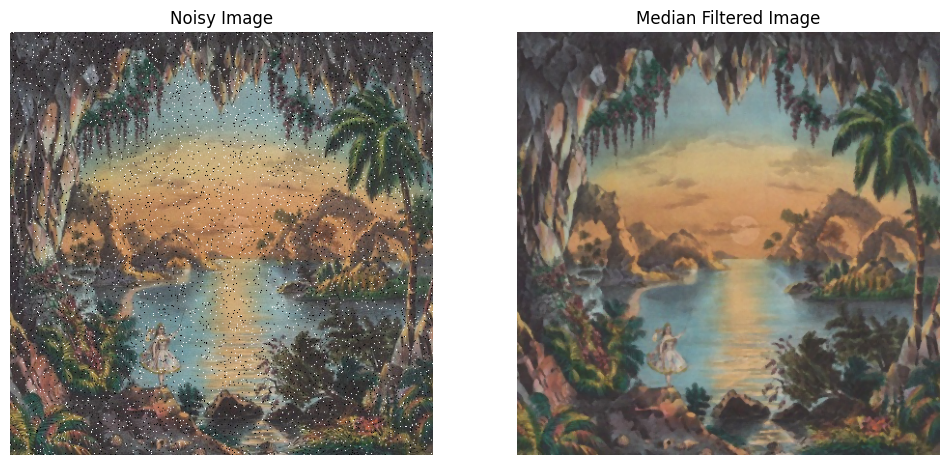

In [15]:
image_url = "https://mypage114041763.files.wordpress.com/2023/09/image_noise.jpg?resize=438%2C438"
req = urllib.request.urlopen(image_url)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
image = cv2.imdecode(arr, -1)

# Define the probability of adding salt and pepper noise
salt_prob = 0.02  # Probability of adding salt noise
pepper_prob = 0.02  # Probability of adding pepper noise

# Copy the original image to work on a new image
noisy_image = np.copy(image)

# Add salt noise (white pixels) to the image
salt_coords = np.random.rand(*image.shape[:2]) < salt_prob
noisy_image[salt_coords] = [255, 255, 255]  # Set salt pixels to white (255, 255, 255)

# Add pepper noise (black pixels) to the image
pepper_coords = np.random.rand(*image.shape[:2]) < pepper_prob
noisy_image[pepper_coords] = [0, 0, 0]  # Set pepper pixels to black (0, 0, 0)



# Apply a median filter to remove the noise
kernel_size = 3  # Adjust the kernel size as needed
median_filtered_image = cv2.medianBlur(noisy_image, kernel_size)

# Display the original noisy image and the filtered image
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(median_filtered_image, cv2.COLOR_BGR2RGB))
plt.title('Median Filtered Image')
plt.axis('off')